___

<a href='https://sites.google.com/fat.uerj.br/livia'><img src="../../figures/capa2.png"/></a>
___

# Regressão Logística com Python

A Regressão Logística nada mais é que a Regressão Linear, mas com a utilização de dados binários (0 e 1) e de uma regressão de uma função sigmóide, que é sempre próxima de 0 ou 1. Então aqui calculamos a probabilidade prevista de um output para um determinado x seja 1.

Para essa discussão iremos trabalhar com [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). É um data set muito famoso e usado com frequência por estudantes como um primeiro passo para o machine learning!

Vamos tentar prever uma classificação-sobrevivência ou morte.Bora começar nosso entendimento da aplicação de regressão logística em Python para classificação.

Nós vamos usar uma versão "quase limpa" do data set do titanic. Se você usar o data set hospedado diretamente pelo Kaggle, você provavelmente precisará realizar uma limpeza adicional, não mostrada aqui.

## Importe Bibliotecas
Vamos importar algumas bibliotecas para começar!

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Os Dados

Vamos iniciar lendo o arquivo titanic_train.csv em um dataframe.

In [49]:
data_folder = '../../data/'
train = pd.read_csv(data_folder + 'titanic_train.csv')

In [50]:
train.head()

,Idpassageiro,Sobreviveu,Classe Passageiro,Nome,Sexo,Idade,SibSp,Correcao,Ticket,Tarifa,Cabine,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train.describe()

,Idpassageiro,Sobreviveu,Classe Passageiro,Idade,SibSp,Correcao,Tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Variáveis:
- Sobreviveu: 0 = Não, 1 = Sim
- Classe Passageiro: 1 = 1° (maior), 2 = 2° (média) e 3 = 3°(menor).
- Sexo: Sexo do passageiro
- Idade: Idade em anos do passageiro.
- Sibsp: Número de irmãos/cônjugues a bordo.
- Correcao: Número de pais/filhos a bordo.
- Ticket: Número do ticket
- Tarifa: Tarifa do passageiro.
- Cabine: Número da cabine
- Embarcou: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

# Análise Exploratória dos Dados

Iremos iniciar uma análise exploratória de dados! Vamos começar checando nossos dados em falta!

## Dados em Falta

Podemos usar o seaborn para criar um mapa de calor simples para visualizar os dados em falta/vazios!

In [52]:
train.isnull()

,Idpassageiro,Sobreviveu,Classe Passageiro,Nome,Sexo,Idade,SibSp,Correcao,Ticket,Tarifa,Cabine,Embarcou
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

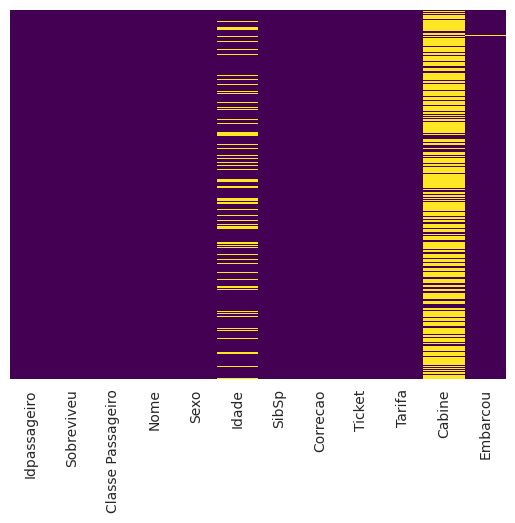

In [53]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
Null_values = train.isnull().sum().sort_values(ascending=False)
Null_values

Cabine               687
Idade                177
Embarcou               2
Idpassageiro           0
Sobreviveu             0
Classe Passageiro      0
Nome                   0
Sexo                   0
SibSp                  0
Correcao               0
Ticket                 0
Tarifa                 0
dtype: int64

Faltam 20% dos dados de idade, uma proporção pequena o bastante para realizar uma substituição por imputaçã, que será explicada em breve. A coluna de cabine tem tanta falta que é impossível fazer algo útil a nível básico. Provavelmente a deixaremos de lado ou mudaremos ela para "Cabine Conhecida: 1 ou 0."

Continuando, vamos visualizar mais os dados! Assista o vídeo para mais explicações sobre esses plots, esse código é apenas uma referência.

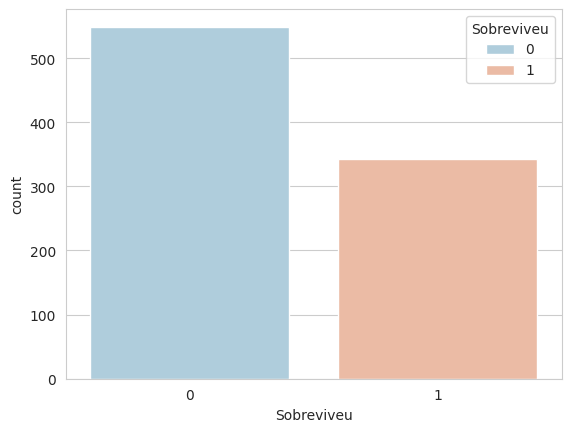

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Sobreviveu',data=train, palette='RdBu_r', hue='Sobreviveu');

**Quantidade menor de sobreviventes**

<Axes: xlabel='Sobreviveu', ylabel='proportion'>

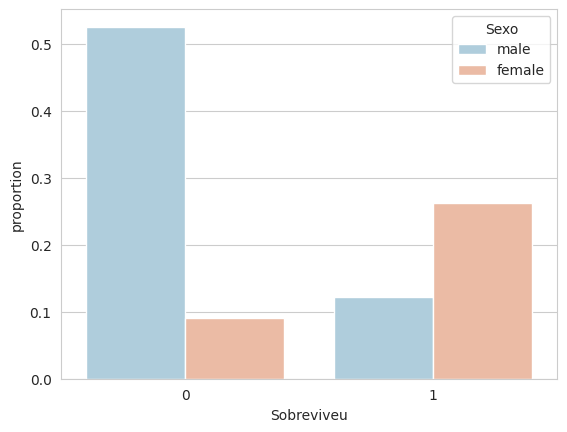

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Sobreviveu',hue='Sexo',data=train,palette='RdBu_r', stat='proportion')

**Homens sobreviveram menos que mulheres**

<Axes: xlabel='Sobreviveu', ylabel='proportion'>

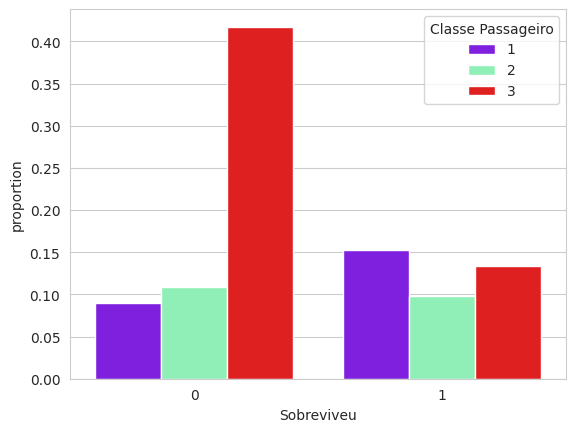

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Sobreviveu',hue='Classe Passageiro',data=train, palette='rainbow', stat='proportion')

**Passageiros Classe 3 foram os que mais morreram.**

**Os de Classe 1 foram os que mais sobreviveram**

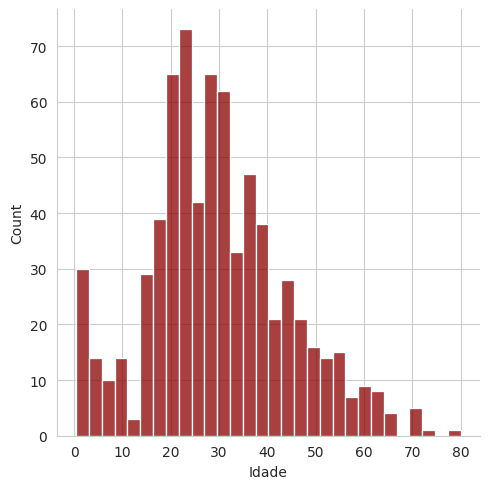

In [58]:
sns.displot(train['Idade'].dropna(),kde=False, color='darkred',bins=30);

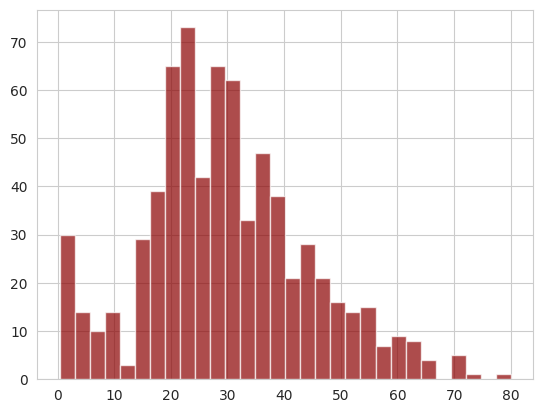

In [59]:
train['Idade'].hist(bins=30,color='darkred',alpha=0.7);

**Maioria dos passageiros entre 20 e 30 anos, aproximadamente**

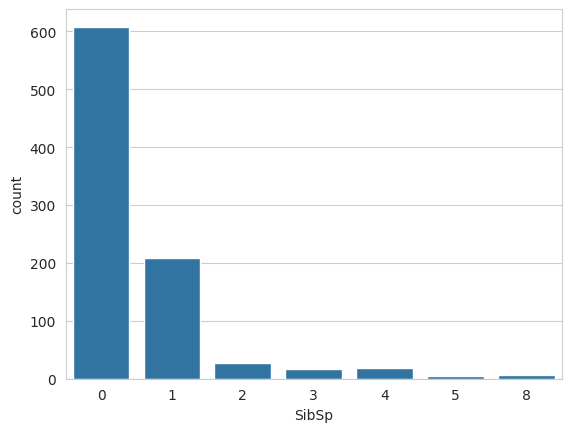

In [60]:
sns.countplot(x='SibSp',data=train);

**Quase todos os passageiros não possuem irmãos/cônjugues como passageiros**.

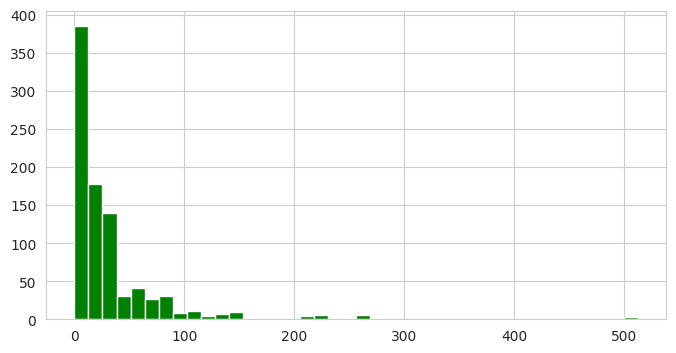

In [61]:
train['Tarifa'].hist(color='green',bins=40,figsize=(8,4));

**Muitas tarifas de valor relativamente baixo e poucas com valores maiores**

___
## Limpeza de Dados
Queremos preencher os espaços sem dados de idade, ao invés de só descartar essas linhas por completo. Uma forma é preencher com a idade média dos passageiros (imputação). De forma mais inteligente podemos preencher de acordo com a idade média dos passageiros de acordo com a classe deles. Por exemplo:

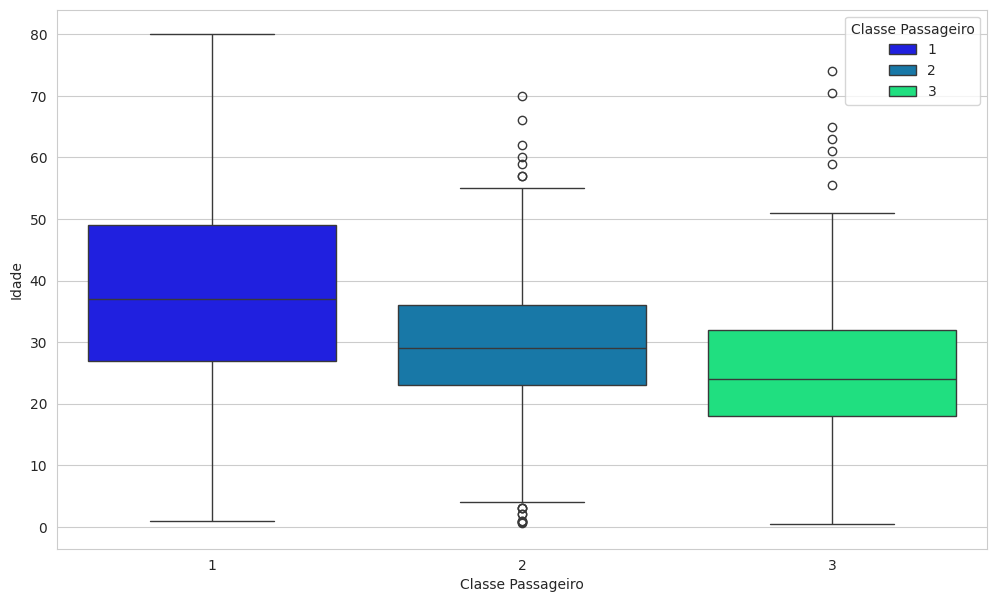

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Classe Passageiro',y='Idade',data=train,palette='winter', hue='Classe Passageiro')
plt.show()

Podemos ver que os passageiros com as maiores classes são mais velhos. A partir disso usaremos dos valores das idades médias para imputar os dados de idade faltantes, de acordo com a classe.

In [63]:
train[train['Classe Passageiro'] == 1]['Idade'].median()

37.0

In [64]:
train[train['Classe Passageiro'] == 2]['Idade'].median()

29.0

In [65]:
train[train['Classe Passageiro'] == 3]['Idade'].median()

24.0

In [66]:
train.columns

Index(['Idpassageiro', 'Sobreviveu', 'Classe Passageiro', 'Nome', 'Sexo',
       'Idade', 'SibSp', 'Correcao', 'Ticket', 'Tarifa', 'Cabine', 'Embarcou'],
      dtype='object')

In [67]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

**Agora aplique essa função!**

In [68]:
train['Idade'] = train[['Idade','Classe Passageiro']].apply(impute_age,axis=1)

**Agora vamos checar o mapa de calor novamente!**

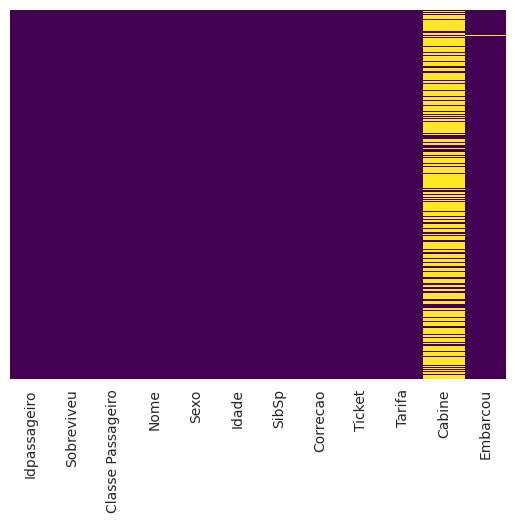

In [69]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Excelente! Vamos adiante e remover a coluna Embarcou e suas linhas que não haviam dados.**

In [70]:
train.drop('Cabine',axis=1,inplace=True)

In [71]:
train.head()

,Idpassageiro,Sobreviveu,Classe Passageiro,Nome,Sexo,Idade,SibSp,Correcao,Ticket,Tarifa,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
train.dropna(inplace=True)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idpassageiro       889 non-null    int64  
 1   Sobreviveu         889 non-null    int64  
 2   Classe Passageiro  889 non-null    int64  
 3   Nome               889 non-null    object 
 4   Sexo               889 non-null    object 
 5   Idade              889 non-null    float64
 6   SibSp              889 non-null    int64  
 7   Correcao           889 non-null    int64  
 8   Ticket             889 non-null    object 
 9   Tarifa             889 non-null    float64
 10  Embarcou           889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Convertendo Caraterísticas Categóricas

**Vamos precisar converter as variáveis qualitativas em  variáveis fictícias usando get_dumies do pandas! Caso contrário nosso algoritmo de machine learning não será capaz de pegar essas características como inputs e ser avaliado.**

In [74]:
pd.get_dummies(train['Sexo'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [75]:
True == 1

True

In [76]:
sexo = pd.get_dummies(train['Sexo'],drop_first=True)
embarcou = pd.get_dummies(train['Embarcou'],drop_first=True)

In [77]:
train.drop(['Sexo','Embarcou','Nome','Ticket', 'Idpassageiro'],axis=1,inplace=True)

In [78]:
train = pd.concat([train,sexo,embarcou],axis=1)

In [79]:
train.head()

,Sobreviveu,Classe Passageiro,Idade,SibSp,Correcao,Tarifa,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


**Observe que retiramos a coluna Sexo, Nome, Embarcou e Ticket**

**Por outro lado entrou as colunas male, Q e S, que darão respostas binárias agora**

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sobreviveu         889 non-null    int64  
 1   Classe Passageiro  889 non-null    int64  
 2   Idade              889 non-null    float64
 3   SibSp              889 non-null    int64  
 4   Correcao           889 non-null    int64  
 5   Tarifa             889 non-null    float64
 6   male               889 non-null    bool   
 7   Q                  889 non-null    bool   
 8   S                  889 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 51.2 KB


Boa! Nossos dados estão prontos para o nosso modelo!

# Construindo um modelo de Regressão Logística 

Iremos começar dividindo nossos dados em um conjuntos, um de treinamento e outro de teste (há um arquivo test.csv que você pode usar, caso queira praticar)

## Divisão Treinamento e Teste

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = train.drop('Sobreviveu', axis=1)
y = train['Sobreviveu']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, 
                                                    random_state=101,
                                                    shuffle=True)

**Recebe X e y. Cada uma será dividida em duas, contendo os dados originais: 70%  treino(_train) e 30% teste(_test).**

## Treinando e Prevendo

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logmodel = LogisticRegression(max_iter=300, solver='newton-cholesky')
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=300, solver='newton-cholesky')

In [85]:
predictions = logmodel.predict(X_test)

In [86]:
X_test

,Classe Passageiro,Idade,SibSp,Correcao,Tarifa,male,Q,S
511,3,24.0,0,0,8.0500,True,False,True
613,3,24.0,0,0,7.7500,True,True,False
615,2,24.0,1,2,65.0000,False,False,True
337,1,41.0,0,0,134.5000,False,False,False
718,3,24.0,0,0,15.5000,True,True,False
...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,True,False,False
450,2,36.0,1,2,27.7500,True,False,True
756,3,28.0,0,0,7.7958,True,False,True
187,1,45.0,0,0,26.5500,True,False,True


In [87]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

In [92]:
y_test.values

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0])

## Validação

Podemos checar precisão,relembrar, pontuação f-1 usando relatório de classificação!

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



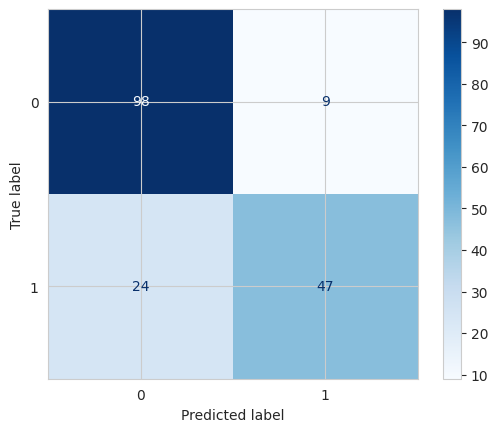

In [99]:
cm = confusion_matrix(y_test,predictions)
cm = ConfusionMatrixDisplay(confusion_matrix=cm)
cm.plot(cmap="Blues");

Nada mal! Conseguimos uma acurácia de 80%, ou seja, há duas observações erroneamente classificadas. Uma delas é falsa negativa e a outra uma falsa positiva.

## Metricas de Avaliação de Classificação

Na avaliação de modelos de classificação, métricas como Precision, Recall e F1-Score desempenham papéis cruciais. Precision foca na qualidade das previsões positivas, Recall na capacidade de capturar todos os casos positivos, e F1-Score equilibra ambas. O Support fornece contexto sobre a distribuição das classes no conjunto de dados. Neste contexto, exploraremos essas métricas e suas equações, destacando sua importância na análise e aprimoramento de modelos de classificação.


1. **Precision (Precisão):**
   - A precisão mede a proporção de instâncias positivas corretamente classificadas em relação a todas as instâncias que foram classificadas como positivas. A fórmula para a precisão é dada por:

     $$\text{Precision} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos + Falsos Positivos}} $$

2. **Recall (Revocação ou Sensibilidade):**
   - A revocação mede a proporção de instâncias positivas corretamente classificadas em relação a todas as instâncias que são realmente positivas. A fórmula para a revocação é dada por:

     $$\text{Recall} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos + Falsos Negativos}} $$

3. **F1-Score:**
   - O F1-Score é a média harmônica da precisão e da revocação. Ele fornece um equilíbrio entre essas duas métricas, sendo útil quando se deseja levar em consideração tanto falsos positivos quanto falsos negativos. A fórmula para o F1-Score é dada por:

     $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}} $$

4. **Support:**
   - O suporte é o número total de instâncias em cada classe no conjunto de dados. Ele não é uma métrica de desempenho, mas é frequentemente relatado para fornecer informações sobre a distribuição das classes no conjunto de dados.

## Finalizando ...

Você deve estar querendo explorar outra engenharia de características e o outro arquivo titanic_text.csv. Algumas sujestões de engenharia de características:

- Tente pegar o título da pessoa (Dr., Mr., Mrs.,etc...) dos nomes como um atributo

- Talvez a letra da Cabine possa ser um atributo

- Há informações úteis no ticket?

## Bom Trabalho!